# **Prediction of diabetes using PIMA diabetes dataset**

## About the Data

* This Dataset has taken from kaggle [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

* The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
# Load the dataset
data = pd.read_csv("./data/pima-data.csv")

In [5]:
data.shape

(768, 10)

In [6]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


## Exploratory Data Analysis (EDA)

In [7]:
# check if any null value is present
data.isnull().values.any()

False

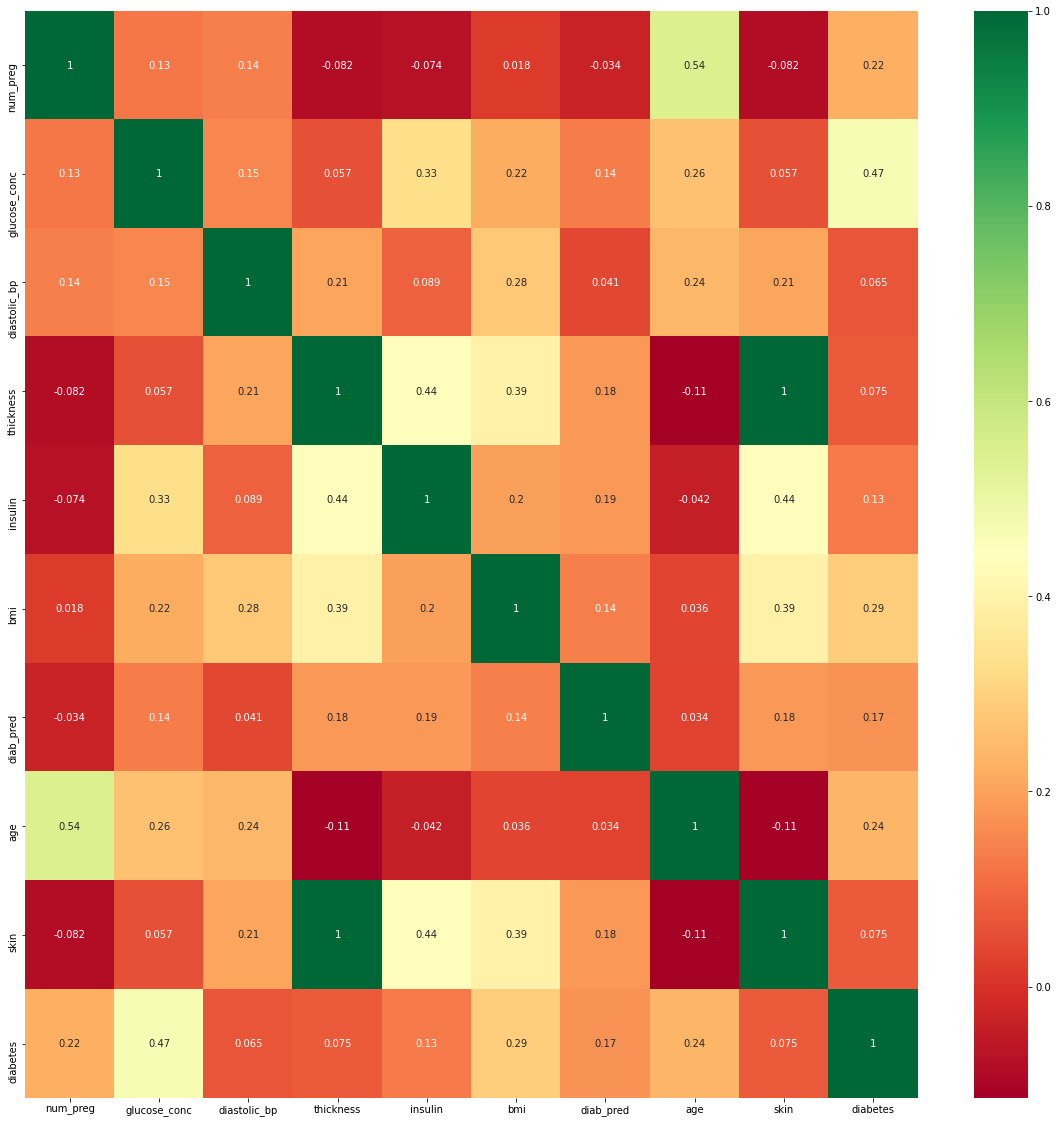

In [8]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
# Describe the dataset
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [11]:
# Now learn our DataFrame using a gradient background
data.head(20).style.background_gradient(cmap='Reds')

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.600000,0.627000,50,1.379000,True
1,1,85,66,29,0,26.600000,0.351000,31,1.142600,False
2,8,183,64,0,0,23.300000,0.672000,32,0.000000,True
3,1,89,66,23,94,28.100000,0.167000,21,0.906200,False
4,0,137,40,35,168,43.100000,2.288000,33,1.379000,True
5,5,116,74,0,0,25.600000,0.201000,30,0.000000,False
6,3,78,50,32,88,31.000000,0.248000,26,1.260800,True
7,10,115,0,0,0,35.300000,0.134000,29,0.000000,False
8,2,197,70,45,543,30.500000,0.158000,53,1.773000,True
9,8,125,96,0,0,0.000000,0.232000,54,0.000000,True


## Changing the diabetes column data from boolean to number

In [12]:
diabetes_map = {True: 1, False: 0}

In [13]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [14]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [15]:
# Now learn our DataFrame using a gradient background
data.head(10).style.background_gradient(cmap='Reds')

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.600000,0.627000,50,1.379000,1
1,1,85,66,29,0,26.600000,0.351000,31,1.142600,0
2,8,183,64,0,0,23.300000,0.672000,32,0.000000,1
3,1,89,66,23,94,28.100000,0.167000,21,0.906200,0
4,0,137,40,35,168,43.100000,2.288000,33,1.379000,1
5,5,116,74,0,0,25.600000,0.201000,30,0.000000,0
6,3,78,50,32,88,31.000000,0.248000,26,1.260800,1
7,10,115,0,0,0,35.300000,0.134000,29,0.000000,0
8,2,197,70,45,543,30.500000,0.158000,53,1.773000,1
9,8,125,96,0,0,0.000000,0.232000,54,0.000000,1


In [16]:
# Checking the skewness of the data
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [17]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

## Check how many other missing(zero) values

In [18]:
print("total number of rows : {0}".format(data.shape[0]))
print("total number of columns : {0}".format(data.shape[1]))

total number of rows : 768
total number of columns : 10


In [19]:
print("total number of rows : {0}".format(data.shape[0]))
print("total number of columns : {0}".format(data.shape[1]))

print("number of rows missing num_preg: {0}".format(len(data.loc[data['num_preg'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing thickness: {0}".format(len(data.loc[data['thickness'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
total number of columns : 10
number of rows missing num_preg: 111
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing thickness: 227
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


## Fill the relevant missing values

In [20]:
df = data.copy()

In [21]:
# Finding the averages

avg_glucose_conc = df['glucose_conc'].mean()
avg_diastolic_bp = df['diastolic_bp'].mean()
avg_thickness = df['thickness'].mean()
avg_insulin = df['insulin'].mean()
avg_bmi = df['bmi'].mean()
avg_skin = df['skin'].mean()

In [22]:
# Now replace 0 with the average value of the respected column

df['glucose_conc'].replace({0:avg_glucose_conc}, inplace=True)
df['diastolic_bp'].replace({0:avg_diastolic_bp}, inplace=True)
df['thickness'].replace({0:avg_thickness}, inplace=True)
df['insulin'].replace({0:avg_insulin}, inplace=True)
df['bmi'].replace({0:avg_bmi}, inplace=True)
df['skin'].replace({0:avg_skin}, inplace=True)

In [23]:
# Now check missing values

print("total number of rows : {0}".format(df.shape[0]))
print("total number of columns : {0}".format(df.shape[1]))

print("number of rows missing num_preg: {0}".format(len(df.loc[df['num_preg'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("number of rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("number of rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(df.loc[df['age'] == 0])))
print("number of rows missing skin: {0}".format(len(df.loc[df['skin'] == 0])))

total number of rows : 768
total number of columns : 10
number of rows missing num_preg: 111
number of rows missing glucose_conc: 0
number of rows missing diastolic_bp: 0
number of rows missing thickness: 0
number of rows missing insulin: 0
number of rows missing bmi: 0
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 0


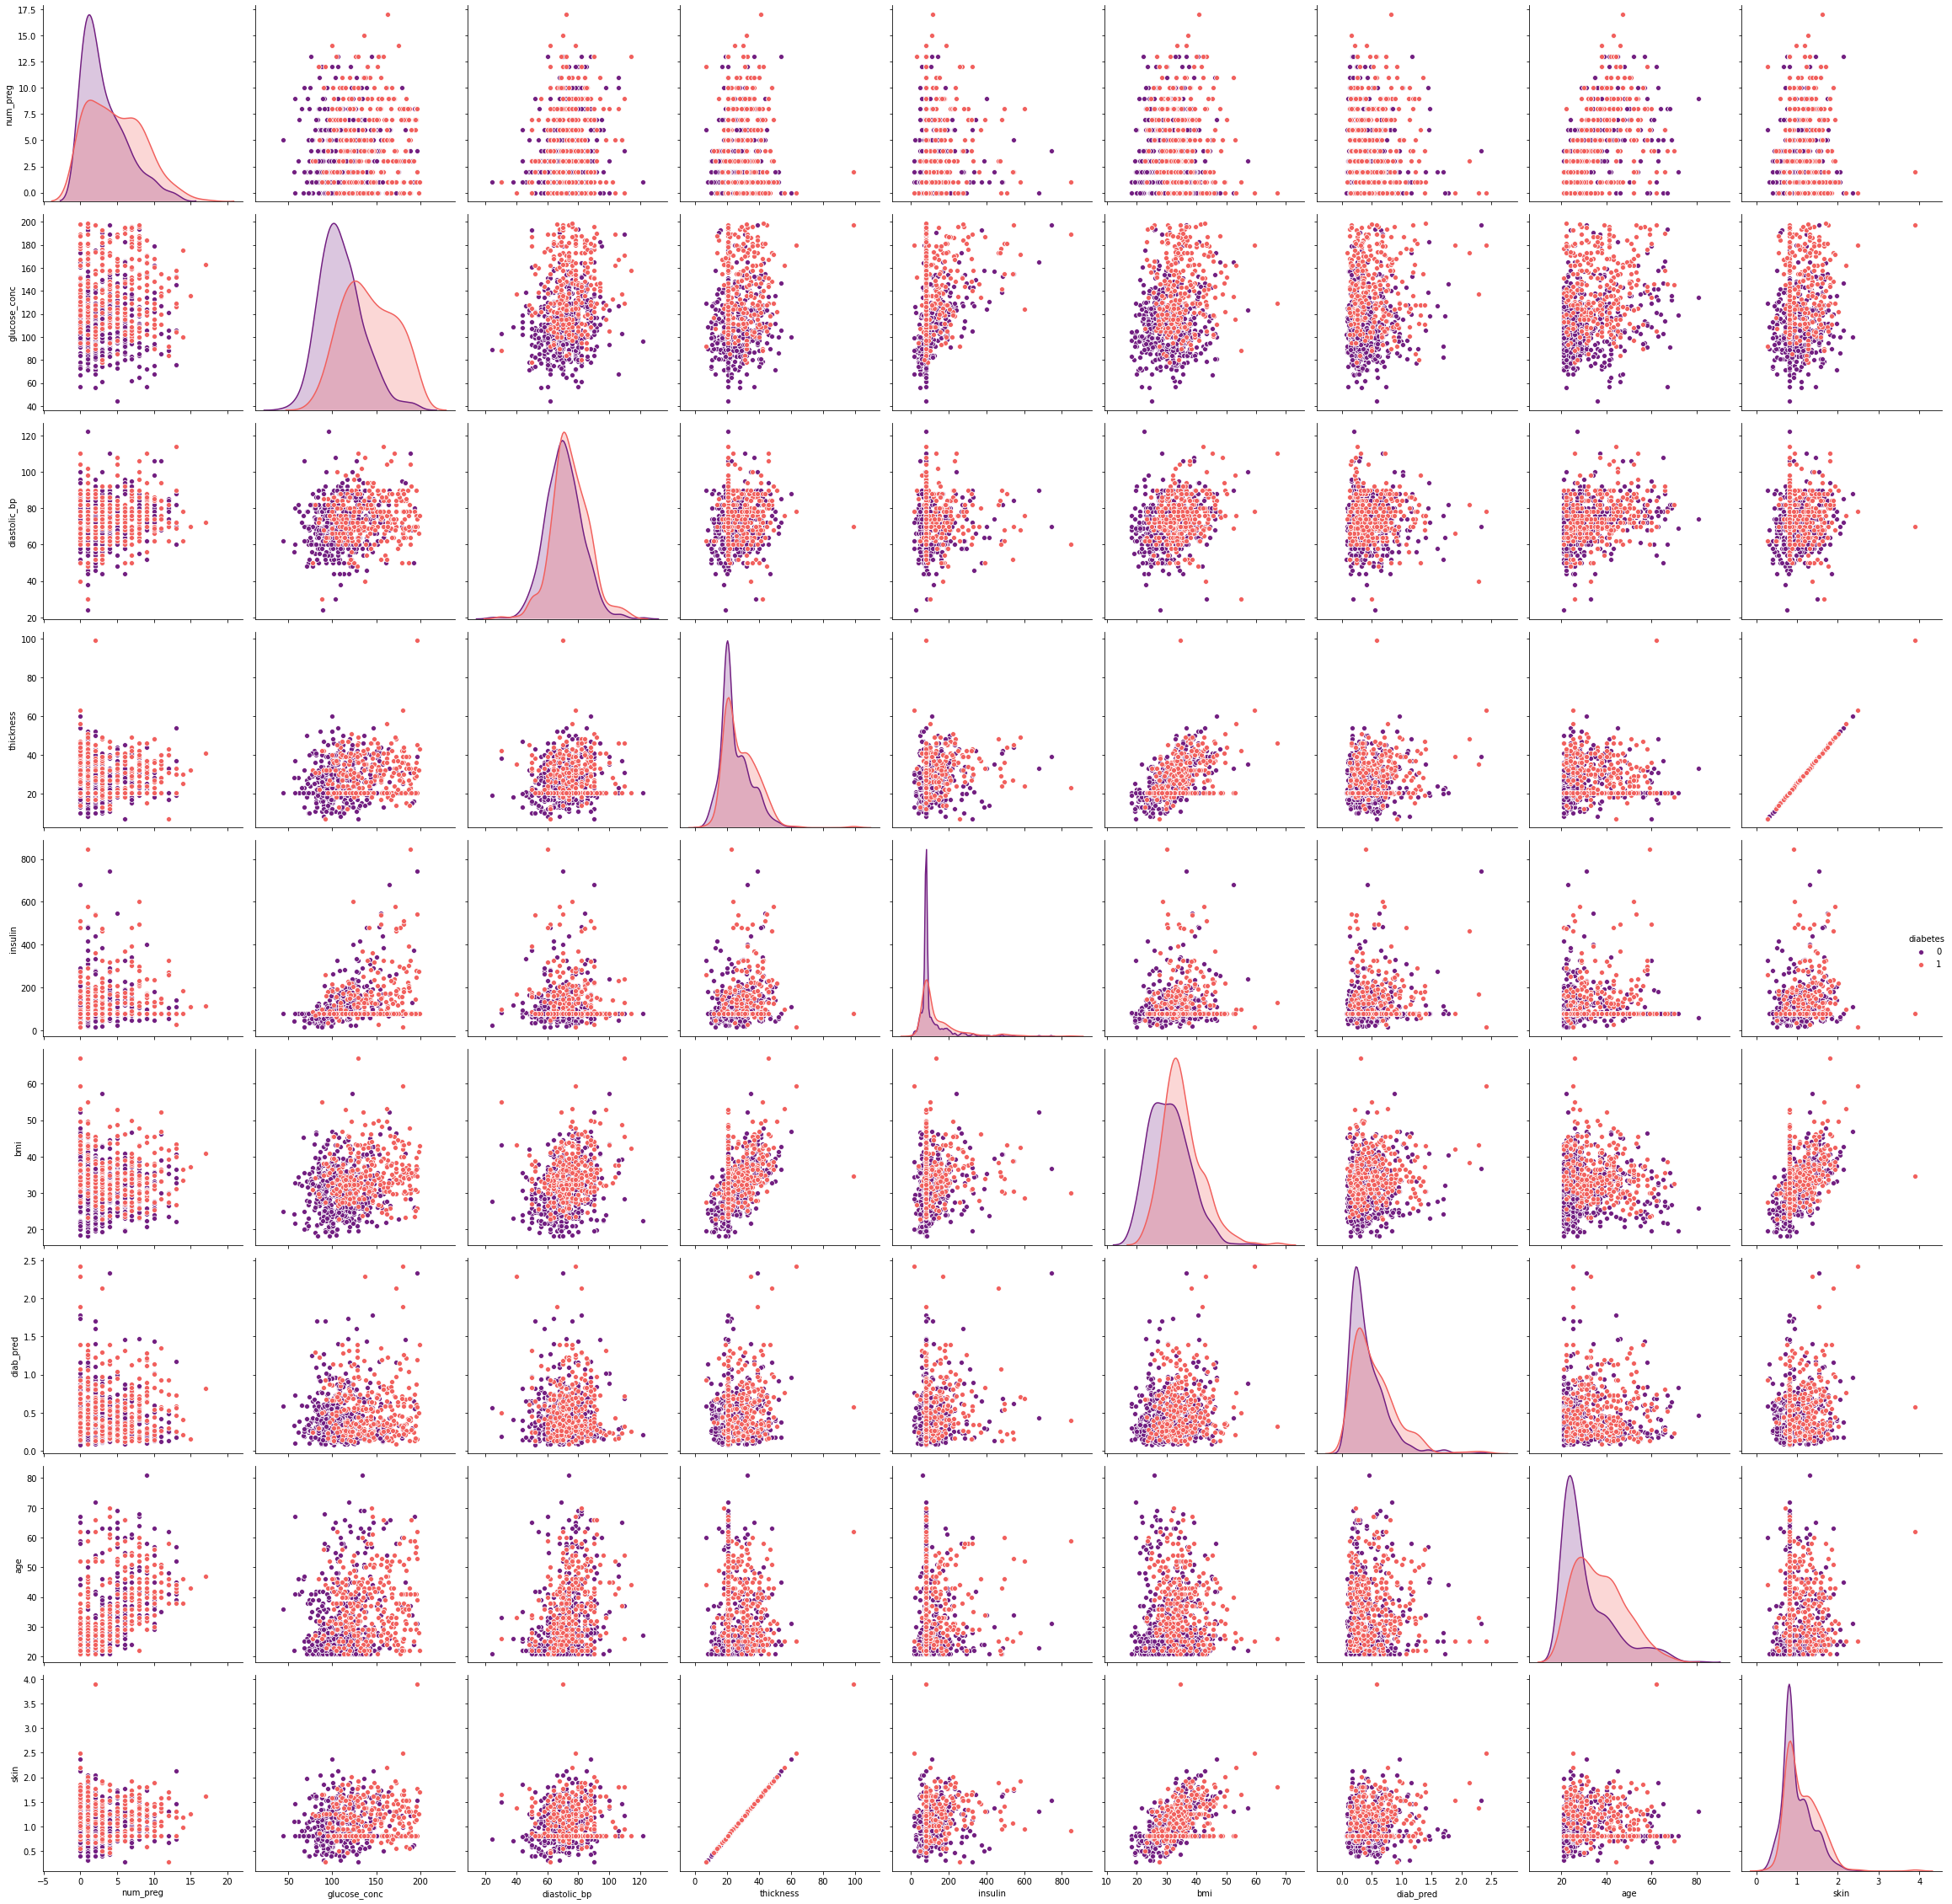

In [24]:
sns.pairplot(df, hue='diabetes',palette='magma',height=3.5)
plt.tight_layout()

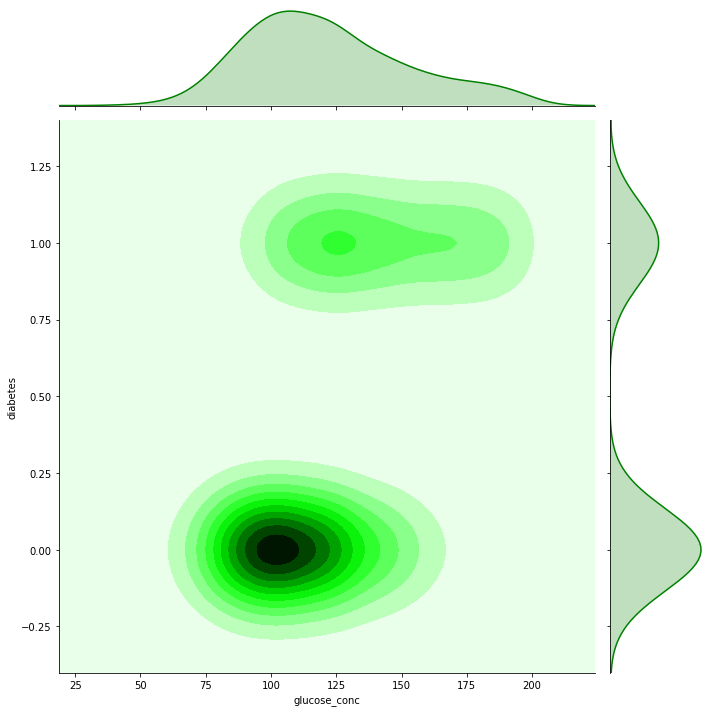

In [25]:
sns.jointplot(x='glucose_conc',y='diabetes',data=df,height=10,kind='kde',color='green')
plt.tight_layout()

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [27]:
# Feature Matrics
X

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1.379000
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,1.142600
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0.809136
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.906200
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.379000
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,1.891200
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,1.063800
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0.906200
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,0.809136


In [28]:
# Output Vector
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [30]:
X_train

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
709,2,93.000000,64.0,32.000000,160.000000,38.0,0.674,23,1.260800
425,4,184.000000,78.0,39.000000,277.000000,37.0,0.264,31,1.536600
135,2,125.000000,60.0,20.000000,140.000000,33.8,0.088,31,0.788000
630,7,114.000000,64.0,20.536458,79.799479,27.4,0.732,34,0.809136
500,2,117.000000,90.0,19.000000,71.000000,25.2,0.313,21,0.748600
...,...,...,...,...,...,...,...,...,...
75,1,120.894531,48.0,20.000000,79.799479,24.7,0.140,22,0.788000
599,1,109.000000,38.0,18.000000,120.000000,23.1,0.407,26,0.709200
575,1,119.000000,44.0,47.000000,63.000000,35.5,0.280,25,1.851800
337,5,115.000000,76.0,20.536458,79.799479,31.2,0.343,44,0.809136


In [31]:
X_train.shape

(614, 9)

In [32]:
y_train.shape

(614,)

In [33]:
X_test

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,0.809136
748,3,187.0,70.0,22.000000,200.000000,36.4,0.408,36,0.866800
42,7,106.0,92.0,18.000000,79.799479,22.7,0.235,48,0.709200
485,0,135.0,68.0,42.000000,250.000000,42.3,0.365,24,1.654800
543,4,84.0,90.0,23.000000,56.000000,39.5,0.159,25,0.906200
...,...,...,...,...,...,...,...,...,...
603,7,150.0,78.0,29.000000,126.000000,35.2,0.692,54,1.142600
510,12,84.0,72.0,31.000000,79.799479,29.7,0.297,46,1.221400
171,6,134.0,70.0,23.000000,130.000000,35.4,0.542,29,0.906200
672,10,68.0,106.0,23.000000,49.000000,35.5,0.285,47,0.906200


In [34]:
y_train

709    1
425    1
135    0
630    1
500    0
      ..
75     0
599    0
575    0
337    1
523    1
Name: diabetes, Length: 614, dtype: int64

# **Model Training**

## 01 - Train our model using SVM

In [35]:
# Import the SVC model
from sklearn.svm import SVC

In [36]:
# Create a SVC object
SVC_model = SVC()

In [37]:
# Now fit our model from our training data (X_train, y_train)
SVC_model.fit(X_train, y_train)

SVC()

In [38]:
svc_predictions = SVC_model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
# Print confusion_matrix
print(confusion_matrix(y_test,svc_predictions))

[[96  7]
 [25 26]]


In [41]:
# Print classification report
print(classification_report(y_test,svc_predictions))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       103
           1       0.79      0.51      0.62        51

    accuracy                           0.79       154
   macro avg       0.79      0.72      0.74       154
weighted avg       0.79      0.79      0.78       154



In [42]:
# Check Accuracy
from sklearn.metrics import accuracy_score
svc_score = accuracy_score(y_test, svc_predictions)
print("Accuracy of SVM model is = {0:.3f}%".format(svc_score*100))

Accuracy of SVM model is = 79.221%


## 02 - Train our model using RandomForest

In [43]:
# Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Create the object
rf = RandomForestClassifier()

In [45]:
# Train the model with our training data
rf.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
# Predictions using test inputs
rf_pred = rf.predict(X_test)

In [47]:
# Print confusion_matrix
print(confusion_matrix(y_test,rf_pred))

[[88 15]
 [19 32]]


In [48]:
# Print classification report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       103
           1       0.68      0.63      0.65        51

    accuracy                           0.78       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.78      0.78      0.78       154



In [49]:
# Check Accuracy
rf_score = accuracy_score(y_test, rf_pred)
print("Accuracy of RandomForest model is = {0:.3f}%".format(rf_score*100))

Accuracy of RandomForest model is = 77.922%


## 03 - Train our model using Logistic Regression

In [50]:
# Now import the 'LogisticRegression' model from 'sklearn.linear_model'
from sklearn.linear_model import LogisticRegression

In [51]:
# Now creating the instences of LogisticRegression model
# Create a LogisticRegression object
log_model = LogisticRegression()

In [52]:
# fit (train) my model on my training data
log_model.fit(X_train, y_train)

/home/manish/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# print the intercept
# intercep is the constant term of our hypothesis
log_model.intercept_

array([-7.14265514])

In [54]:
# Now check the coefficients which are associated with each feature of the training data
log_model.coef_

array([[ 5.29339559e-02,  3.35118303e-02, -2.74988133e-02,
        -1.53312523e-02, -1.41928592e-03,  9.31441177e-02,
         1.89160180e+00,  2.57983931e-02, -6.04051340e-04]])

In [55]:
log_pred = log_model.predict(X_test)

In [57]:
# Convert the predictions from array to Series
predicted_values = pd.Series(data = log_pred)

In [58]:
confusion_matrix(y_test, log_pred)

array([[90, 13],
       [18, 33]])

In [59]:
# Generate the classcification report
cf_report = classification_report(y_test, log_pred)
print(cf_report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       103
           1       0.72      0.65      0.68        51

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.80      0.80       154



In [60]:
# Check Accuracy
log_score = accuracy_score(y_test, log_pred)
print("Accuracy of Logistic Regression model is = {0:.3f}%".format(log_score*100))

Accuracy of Logistic Regression model is = 79.870%


## 04 - Train our model using GridSearch

# Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

* **Large C** value gives low bias and high varience.
* **Small C** value gives high bias and low varience.
* **Large gama** value gives High bias and low varience.
* **Small gama** value gives low bias and High varience.

**Import GridsearchCV from SciKit Learn.**

In [62]:
# Import the model for GridSearch
from sklearn.model_selection import GridSearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

**Create a dictionary called param_grid and fill out some parameters for 'C' and 'gamma'.**

In [82]:
# Create a dictionary for grid parameters ('C' and 'gama')
param_grid = {'C': [0.05, 0.1, 1, 10, 100, 1000, 5000, 10000], 'gamma': [1, 0.1, 0.05, 0.01, 0.001, 0.0001, 0.00001, 0.000001], 'kernel': ['rbf']} 

In [83]:
param_grid

{'C': [0.05, 0.1, 1, 10, 100, 1000, 5000, 10000],
 'gamma': [1, 0.1, 0.05, 0.01, 0.001, 0.0001, 1e-05, 1e-06],
 'kernel': ['rbf']}

**Create a GridSearchCV object and fit it to the training data.**

In [84]:
# Now create a Gridsearch object
# Passing estimator = SVC
# Passing verbose = 3
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [85]:
# Now train our model with our training set (X_train, y_train)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.05, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.05, gamma=1, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.05, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.05, gamma=1, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.05, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.05, gamma=1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.05, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.05, gamma=1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.05, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.05, gamma=1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.05, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.05, gamma=0.1, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.05, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ....... C=0.05, gamma=0.1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.05, gamma=0.05, kernel=rbf ..................................
[CV] ...... C=0.05, gamma=0.05, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.05, gamma=0.05, kernel=rbf ..................................
[CV] ...... C=0.05, gamma=0.05, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.05, gamma=0.05, kernel=rbf ..................................
[CV] ...... C=0.05, gamma=0.05, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.05, gamma=0.05, kernel=rbf ..................................
[CV] ...... C=0.05, gamma=0.05, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.05, gamma=0.05, kernel=rbf ..................................
[CV] ...... C=0.05, gamma=0.05, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.05, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.05, gamma=0.01, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.05, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   11.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.05, 0.1, 1, 10, 100, 1000, 5000, 10000],
                         'gamma': [1, 0.1, 0.05, 0.01, 0.001, 0.0001, 1e-05,
                                   1e-06],
                         'kernel': ['rbf']},
             verbose=5)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [87]:
# Check the best parameters combination
grid.best_params_

{'C': 1000, 'gamma': 1e-06, 'kernel': 'rbf'}

In [88]:
# Check the best estimator
grid.best_estimator_

SVC(C=1000, gamma=1e-06)

Now we can re-run predictions on this grid object just like we would with a normal model.

**Now take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them.**

In [90]:
# Make predictions with our test data (X_test)
grid_predictions = grid.predict(X_test)

In [93]:
# Print confusion_matrix
print(confusion_matrix(y_test,grid_predictions))

[[91 12]
 [21 30]]


In [94]:
# Print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       103
           1       0.71      0.59      0.65        51

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [95]:
# Check Accuracy
grid_score = accuracy_score(y_test, grid_predictions)
print("Accuracy of GridSearchCV model is = {0:.3f}%".format(grid_score*100))

Accuracy of GridSearchCV model is = 78.571%


## Save and Load trained model using pickle

In [96]:
# Create a Pickle file using serialization 
import pickle

In [97]:
# Save SVM model
pickle.dump(SVC_model,open('SVC_model.pkl','wb'))

# Save Random-Forest model
pickle.dump(rf,open('rf.pkl','wb'))

# Save Logistic-Regression model
pickle.dump(log_model,open('log_model.pkl','wb'))

# Save GridSearchCV model
pickle.dump(grid,open('grid.pkl','wb'))

## Love you 3000 !

In [4]:
import numpy as np
import pandas as pd
import streamlit as st
from pandas_profiling import ProfileReport
from streamlit_pandas_profiling import st_profile_report